<div style="max-width:66ch;">

# Lecture notes - Read excel

This is the lecture note for **reading excel** - but it's built upon contents from previous course: 
- Python programming

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to Pandas. I encourage you to read further about pandas.

</div>


<div style="max-width:66ch;">

## Read excel data
- reads an .xlsx-file and stores it as DataFrame object

Data comes from: [kaggle calory data](https://www.kaggle.com/kkhandekar/calories-in-food-items-per-100-grams)

</div>

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # used for plotting 

df = pd.read_excel("../data/calories.xlsx") #require openpyxl in virtual environment
df.head() # see the first n rows of DataFrame, n = 5 by default 

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [5]:
# info about df (dtypes, non-null values and memory usage)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [6]:
# see liquids and solid foods
df["FoodCategory"].unique() 

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [7]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

<div style="max-width:66ch;">

## Data cleaning 

- notice that all data types are object, need to type convert to int
Strategy
- change column names
- convert Cals_per100grams to int to make calculations with it
- separate into liquids and solid dfs 

</div>

In [8]:
df = df.rename(dict(Cals_per100grams="Calories",
               per100grams="per100", KJ_per100grams="kJ"), axis="columns")
df.head()


,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [9]:
# convert Calories to int 
df["Calories"] = df["Calories"].str[:-3].astype(int)
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [10]:
# check number of values in solids and liquids
df["per100"].value_counts()

per100
100g     1802
100ml     423
Name: count, dtype: int64

In [11]:
liquids = df[df["per100"] == "100ml"]
liquids.head(2)

,FoodCategory,FoodItem,per100,Calories,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ


In [12]:
solids = df[df["per100"] == "100g"]
solids.head(2)

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ


## Find out top 5 categories of highest calories

In [13]:
solids_sorted = solids.sort_values(by="Calories", ascending=False) # sorting descending by Calories column
solids_top5 = solids_sorted.iloc[:5] # Python-way slicing
solids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
675,Pork,Lard,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [14]:
liquids_top5 = liquids.sort_values(by="Calories", ascending=False).head()
liquids_top5

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1771,Oils&Fats,Sardine Oil,100ml,902,3788 kJ


In [15]:
top5_category = df.groupby("FoodCategory")["Calories"].median().sort_values(
    ascending=False
).reset_index().iloc[:5]

top5_category

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


/var/folders/wx/w9rjl8097253hjvtyhbf7qjc0000gn/T/ipykernel_2200/2083033668.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/wx/w9rjl8097253hjvtyhbf7qjc0000gn/T/ipykernel_2200/2083033668.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/wx/w9rjl8097253hjvtyhbf7qjc0000gn/T/ipykernel_2200/2083033668.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


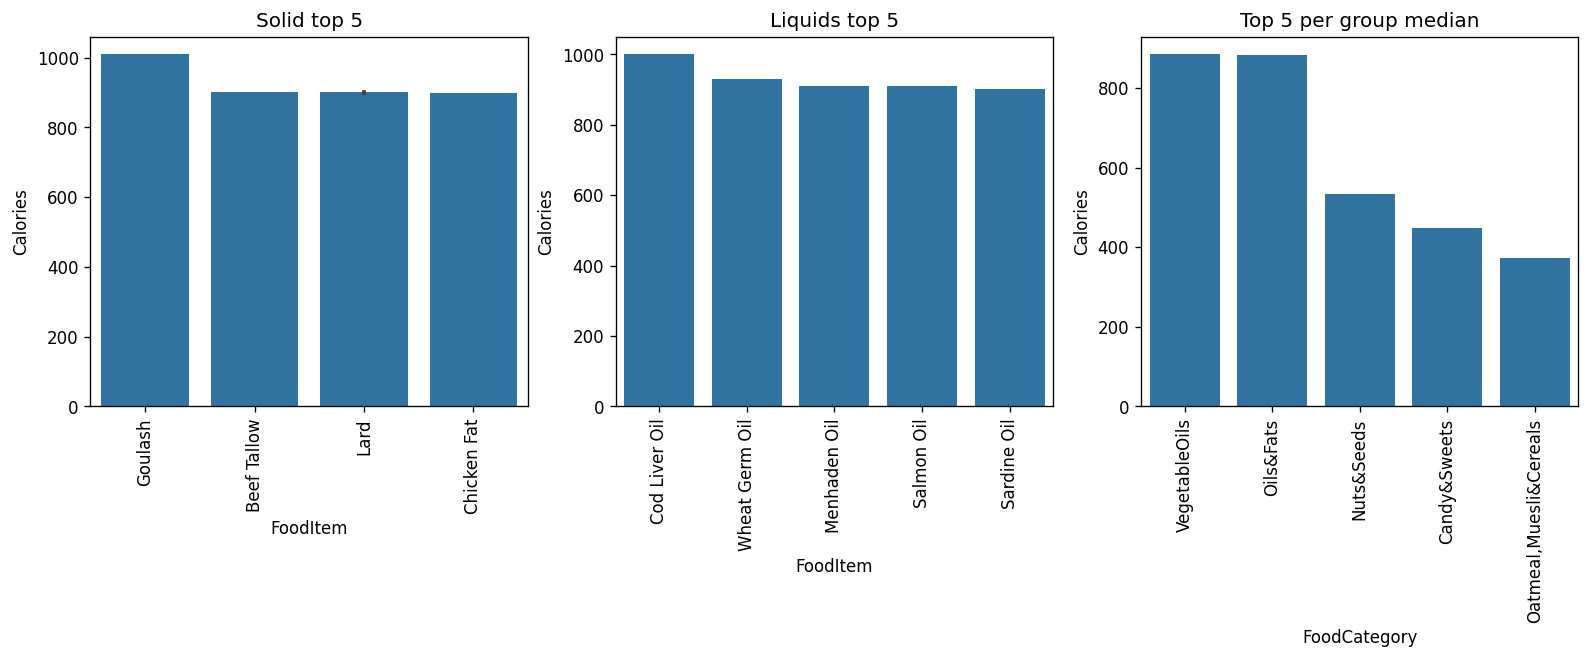

In [17]:
# visualization using seaborn
fig, axes = plt.subplots(1,3, dpi=120, figsize=(16,4))

titles = ["Solid top 5", "Liquids top 5", "Top 5 per group median"]
data_frames = [solids_top5, liquids_top5, top5_category]
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]

for ax, data, title, x_column in zip(axes, data_frames, titles, x_columns): 
    sns.barplot(data = data, x=x_column, y="Calories", ax = ax)
    ax.set(title=title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig("../figures/Calories.png", facecolor="white", bbox_inches="tight")

<div style="max-width:66ch;">

## Summary

In this lecture we've covered the very basics of Pandas as a dataprocessing library, where we've done some simple data cleaning tasks and data visualisation using seaborn. 

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
